In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # for saving model


In [ ]:
import kagglehub

# Download and read dataset
path = kagglehub.dataset_download("andrewmvd/cyberbullying-classification")
df = pd.read_csv(f"{path}/cyberbullying_tweets.csv")

# Display first 5 rows
print(df.head())


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [ ]:
# Summary
print(df.info())
print(df.describe())

# Count samples per class
print(df['cyberbullying_type'].value_counts())
print("Total samples:", len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None
                      tweet_text cyberbullying_type
count                      47692              47692
unique                     46017                  6
top     MARINATED IN GATER TEARS           religion
freq                           2               7998
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64
Total samples: 47692


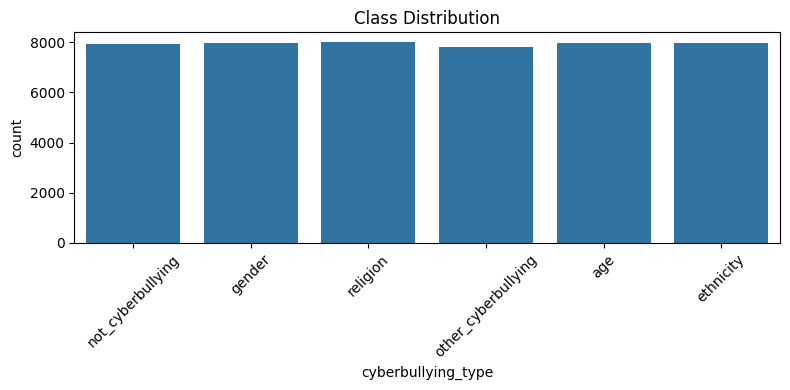

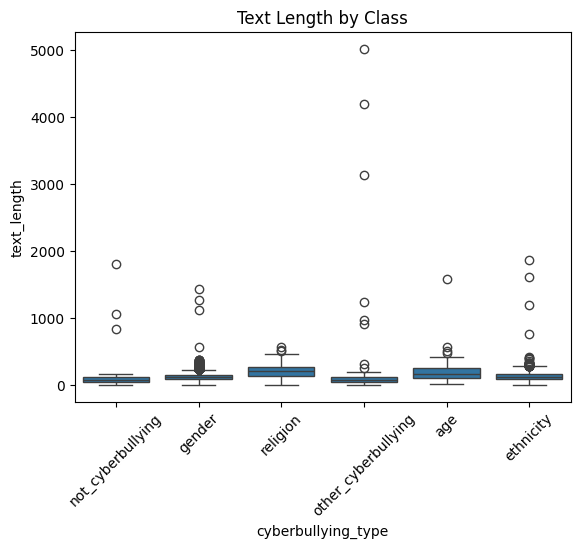

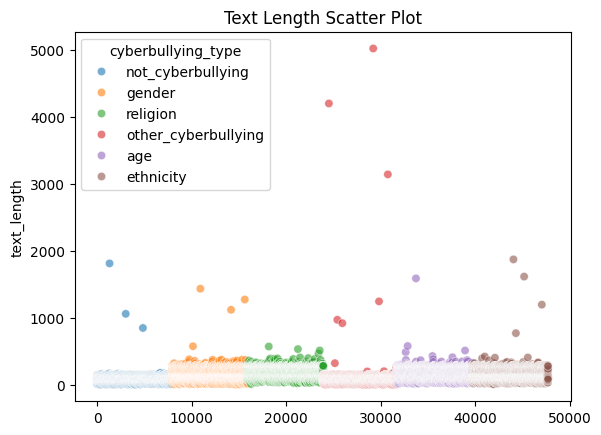

In [ ]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='cyberbullying_type')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot and scatterplot for text length
df['text_length'] = df['tweet_text'].apply(len)

# Boxplot
sns.boxplot(data=df, x='cyberbullying_type', y='text_length')
plt.title("Text Length by Class")
plt.xticks(rotation=45)
plt.show()

# Scatterplot
sns.scatterplot(data=df, x=range(len(df)), y='text_length', hue='cyberbullying_type', palette='tab10', alpha=0.6)
plt.title("Text Length Scatter Plot")
plt.show()


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Extract features: text length (for basic model), could add NLP features later
df['text_length'] = df['tweet_text'].apply(len)

# Separate features and target
X = df[['text_length']]
y = df['cyberbullying_type']

# Standardize using Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display result
print("Standardized features:\n", X_scaled[:5])


Standardized features:
 [[-0.88291759]
 [-0.24945236]
 [-0.89464843]
 [-0.39022241]
 [-0.39022241]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression()

In [ ]:
# Step 8: Train the model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("\nEvaluation Report:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save the trained model
joblib.dump(model, 'cyberbullying_model.pkl')


Evaluation Report:
[[144  95 168 327  91 773]
 [ 57 215 380 461 116 363]
 [ 50 304 359 458 105 314]
 [  1 221 318 933 114   0]
 [  0 191 371 895 106   2]
 [108 162 239 125  59 907]]
                     precision    recall  f1-score   support

                age       0.40      0.09      0.15      1598
          ethnicity       0.18      0.14      0.15      1592
             gender       0.20      0.23      0.21      1590
  not_cyberbullying       0.29      0.59      0.39      1587
other_cyberbullying       0.18      0.07      0.10      1565
           religion       0.38      0.57      0.46      1600

           accuracy                           0.28      9532
          macro avg       0.27      0.28      0.24      9532
       weighted avg       0.27      0.28      0.24      9532

Accuracy: 0.2794796475031473


['cyberbullying_model.pkl']

In [ ]:
# Load the model (simulate future prediction)
model = joblib.load("cyberbullying_model.pkl")

# Example new data: simulate text length of a new tweet
new_texts = ["You are worthless and nobody likes you!", "You’re such a good friend!"]
new_lengths = np.array([[len(text)] for text in new_texts])
new_lengths_scaled = scaler.transform(new_lengths)

# Predict
predictions = model.predict(new_lengths_scaled)
for text, pred in zip(new_texts, predictions):
    print(f"Tweet: {text}\nPredicted Category: {pred}\n")


Tweet: You are worthless and nobody likes you!
Predicted Category: not_cyberbullying

Tweet: You’re such a good friend!
Predicted Category: not_cyberbullying



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
